In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [52]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
df.duplicated().sum()


0

In [57]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')

In [58]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [60]:
count = df["Gender"].value_counts()

**Distribution of genders**

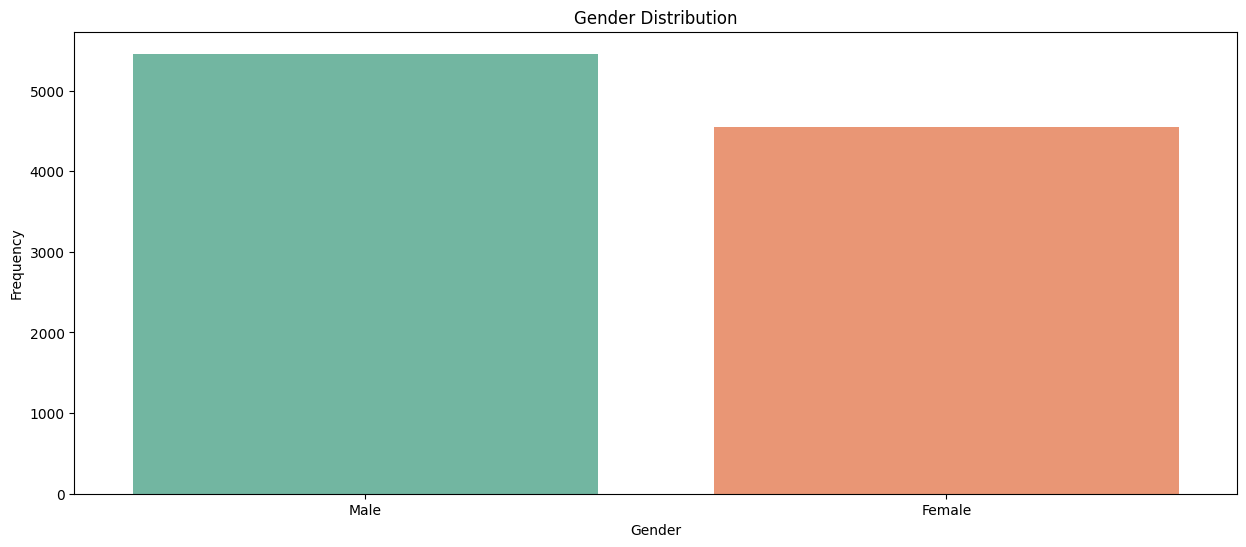

In [61]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

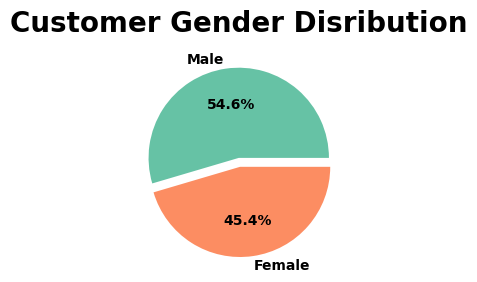

In [62]:
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=10)

plt.show()

In [63]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [64]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

**Most customers have credit scores clustered around the middle range**

/tmp/ipykernel_35/1253532727.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['CreditScore'], kde=True, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


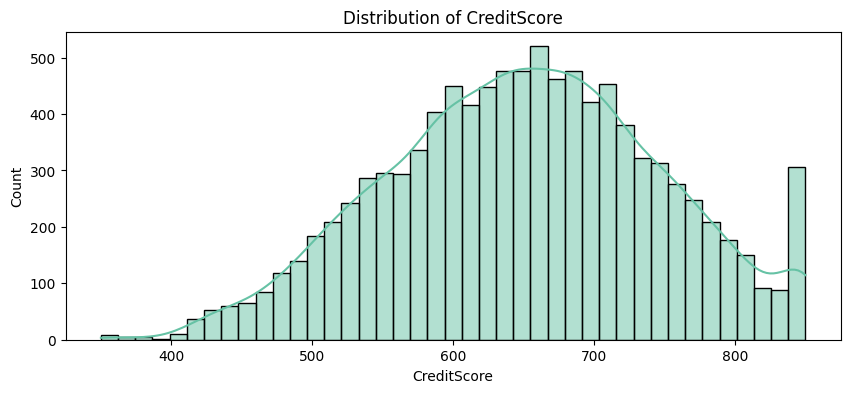

In [65]:
plt.figure(figsize=(10, 4))
sns.histplot(df['CreditScore'], kde=True, palette="Set2")
plt.title("Distribution of CreditScore")
plt.show()

In [66]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [67]:
count = df["Geography"].value_counts()

**pie chart shows how the data is divided into different groups**

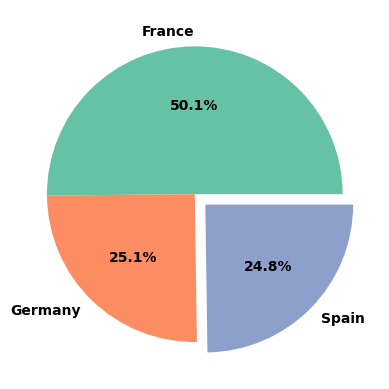

In [68]:
plt.subplot(1,1,1)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
textprops={"fontweight":"black"},explode=[0, 0,0.1])

plt.show()

**bar chart shows the number of customers from each country**

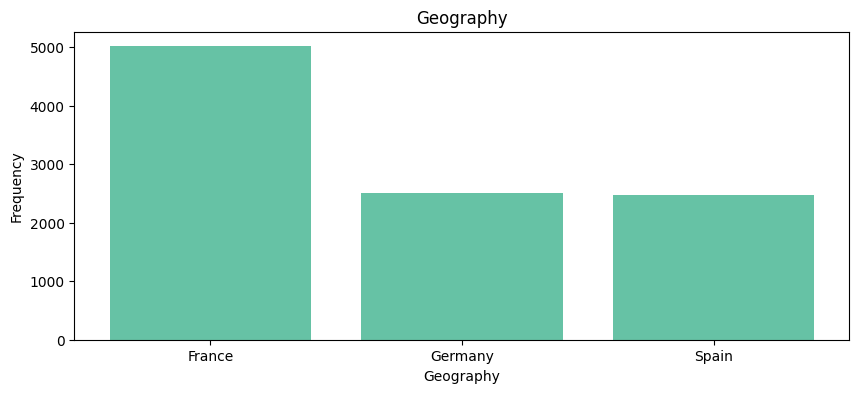

In [69]:

plt.figure(figsize=(10, 4))
plt.bar(df['Geography'].value_counts().index, df['Geography'].value_counts().values, color=sns.set_palette("Set2"))
plt.title('Geography')
plt.xlabel('Geography')
plt.ylabel('Frequency')

plt.show()

In [70]:
df["Tenure"].value_counts()


Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [71]:
count = df["Tenure"].describe()


**Most customers have a tenure between 1 and 10 years**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


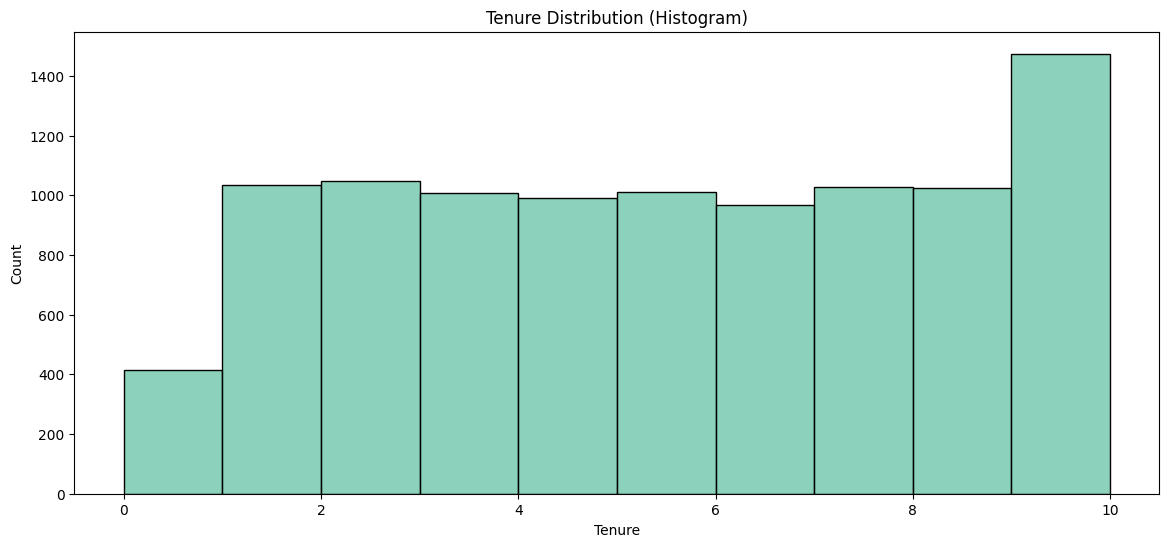

In [72]:
plt.figure(figsize=(14,6))

ax = sns.histplot(data=df, x="Tenure", bins=10, kde=False, color=sns.set_palette("Set2"), edgecolor="black")

plt.title("Tenure Distribution (Histogram)")
plt.xlabel("Tenure")
plt.ylabel("Count")

plt.show()


**Most customers have either very low or very high balances**

/tmp/ipykernel_35/3427814781.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Balance'], kde=True, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


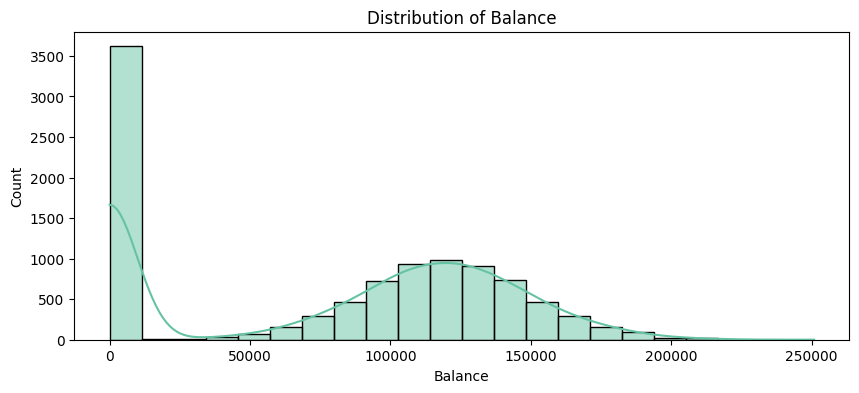

In [73]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Balance'], kde=True, palette="Set2")
plt.title("Distribution of Balance")
plt.show()

In [74]:
df["NumOfProducts"].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [75]:
count = df["NumOfProducts"].value_counts()


**Most customers have 1 or 2 products**

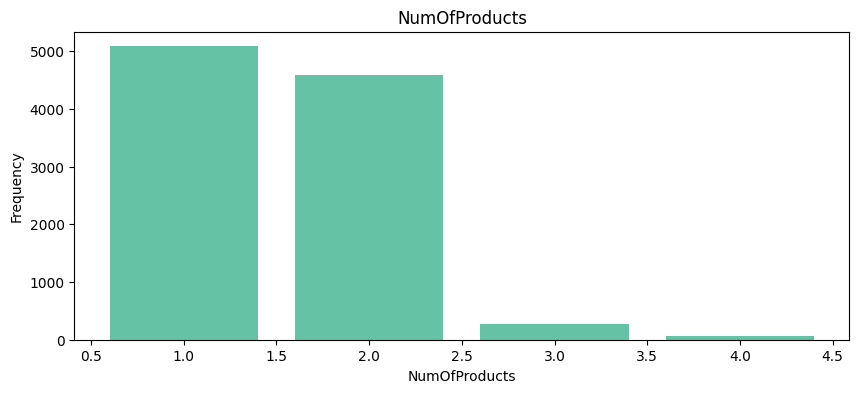

In [76]:
plt.figure(figsize=(10, 4))
plt.bar(df['NumOfProducts'].value_counts().index, df['NumOfProducts'].value_counts().values, color=sns.set_palette("Set2"))
plt.title('NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')

plt.show()

In [77]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

**estimated salaries are widely spread among customers**

/tmp/ipykernel_35/1683735835.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['EstimatedSalary'], kde=True, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


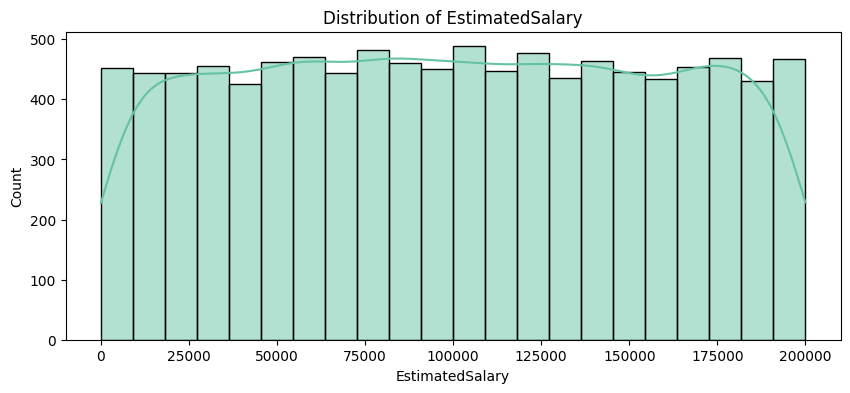

In [78]:
plt.figure(figsize=(10, 4))
sns.histplot(df['EstimatedSalary'], kde=True, palette="Set2")
plt.title("Distribution of EstimatedSalary")
plt.show()

In [79]:
df["Exited"].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [80]:
count = df["Exited"].value_counts()

**most customers stayed, and fewer customers left the bank**

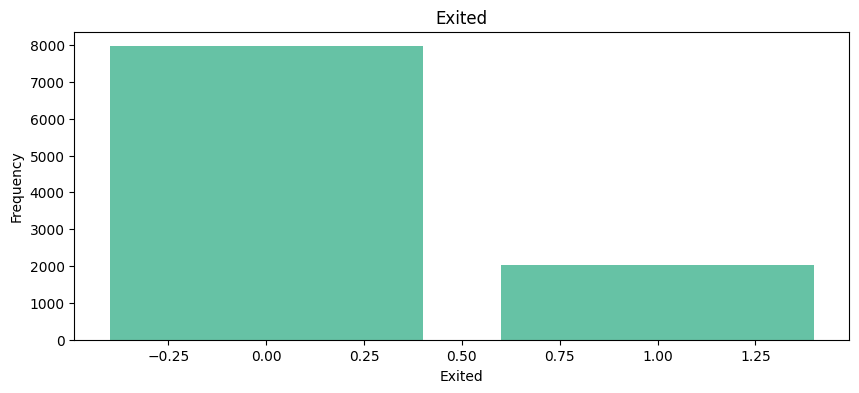

In [81]:
plt.figure(figsize=(10, 4))
plt.bar(df['Exited'].value_counts().index, df['Exited'].value_counts().values, color=sns.set_palette("Set2"))
plt.title('Exited')
plt.xlabel('Exited')
plt.ylabel('Frequency')

plt.show()

**percentage of customers who stayed and who left**

([<matplotlib.patches.Wedge at 0x7ca945a160d0>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'No'),
  Text(0.9625561556222189, -0.7165791284106559, 'Yes')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.5614910907796276, -0.41800449157288255, '20.4%')])

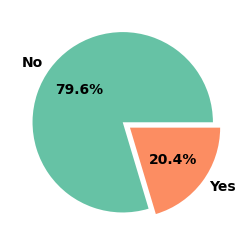

In [82]:
plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])


**compares credit scores of customers who stayed and those who left**

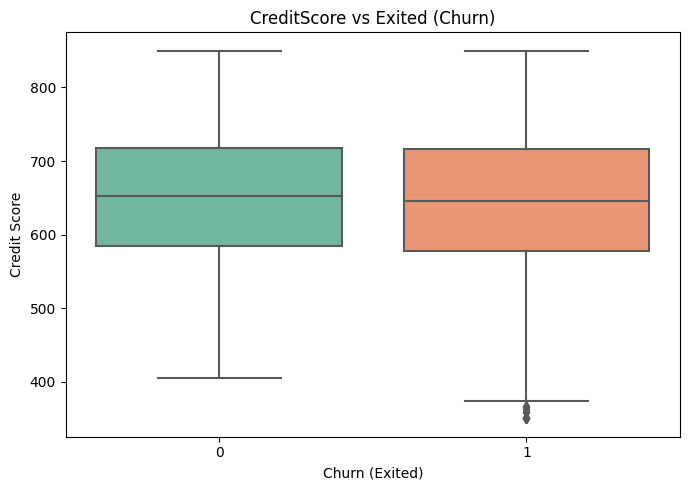

In [83]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('CreditScore vs Exited (Churn)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Credit Score')
plt.tight_layout()
plt.show()

**older customers are more likely to leave the bank than younger ones.**

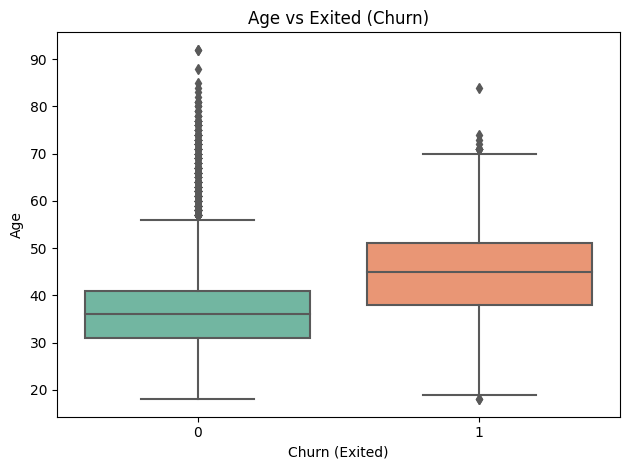

In [84]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Exited (Churn)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

**customers who left usually had more money in their accounts than those who stayed.**

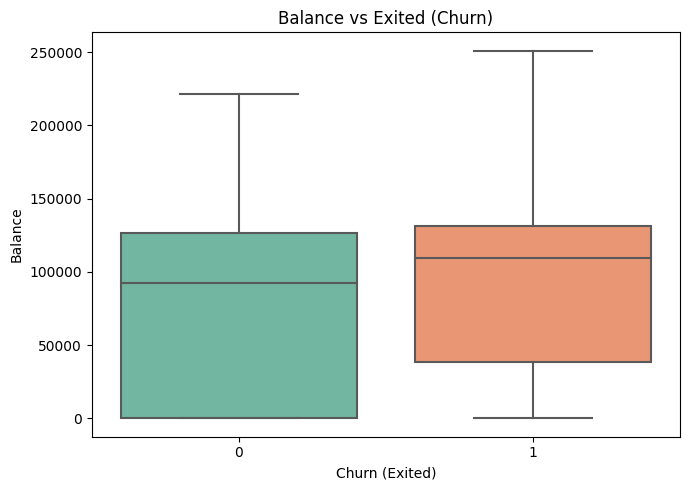

In [85]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited (Churn)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()

**salary doesn’t have a big effect on whether customers leave or stay.**

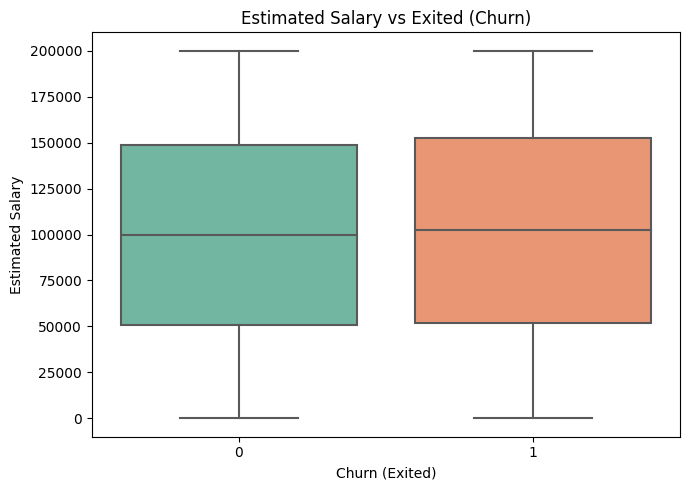

In [86]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Exited (Churn)')
plt.xlabel('Churn (Exited)')
plt.ylabel('Estimated Salary')
plt.tight_layout()
plt.show()

**Both customers who left and who stayed have a wide range of balances and salaries,**

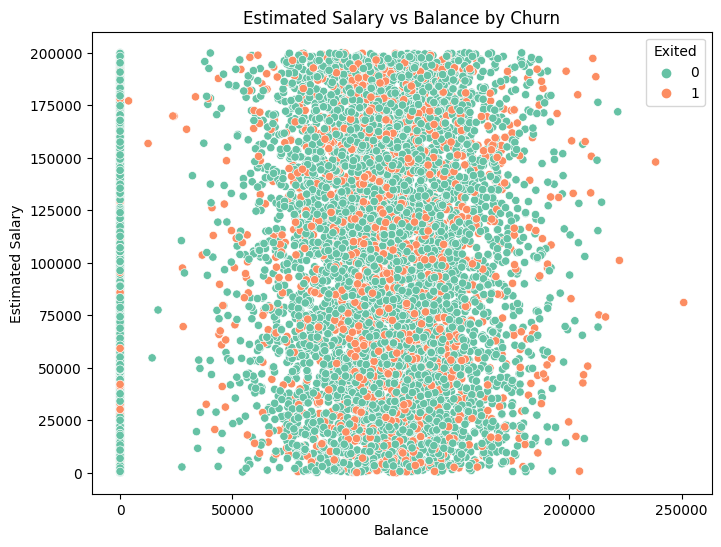

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=df, palette='Set2')
plt.title('Estimated Salary vs Balance by Churn')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.show()

**customers leave at about the same rate, no matter how high or low their salary is.**

/tmp/ipykernel_35/895075235.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_churn = df.groupby('SalaryGroup')['Exited'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


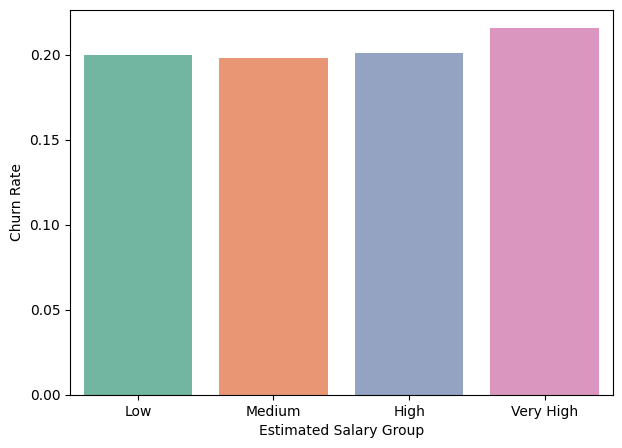

In [88]:
df['SalaryGroup'] = pd.qcut(df['EstimatedSalary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

salary_churn = df.groupby('SalaryGroup')['Exited'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='SalaryGroup', y='Exited', data=salary_churn)
plt.ylabel('Churn Rate')
plt.xlabel('Estimated Salary Group')
plt.show()

**how many men and women leave the bank in each salary group**

/tmp/ipykernel_35/2584220202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_gender_churn = df.groupby(['SalaryGroup', 'Gender'])['Exited'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

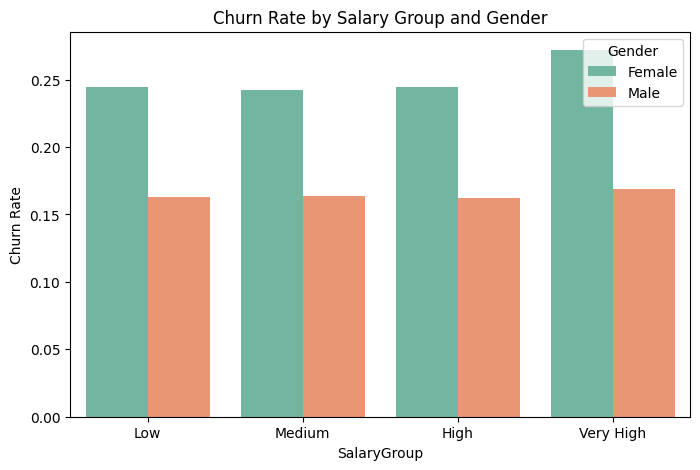

In [89]:
salary_gender_churn = df.groupby(['SalaryGroup', 'Gender'])['Exited'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='SalaryGroup', y='Exited', hue='Gender', data=salary_gender_churn)
plt.title('Churn Rate by Salary Group and Gender')
plt.ylabel('Churn Rate')
plt.show()

In [90]:
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

In [91]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [92]:
correlation_matrix = numeric_df.corr()

**data are more related to each other, especially what affects if a customer leaves or stays.**


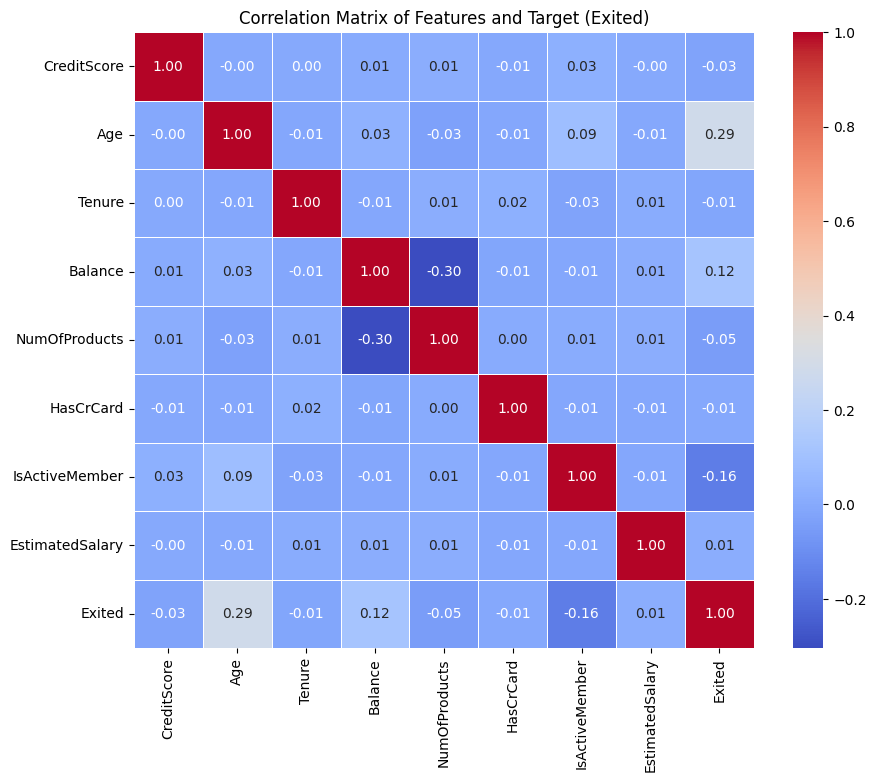

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Exited', axis=1)

X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [95]:
[1, 2, 3, 4, 5, 6]
rs=42

[4, 5, 3, 1, 2, 6]

rs=3
[5, 6, 4, 3, 1, 2]

[5, 6, 4, 3, 1, 2]

In [96]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]


In [97]:
X.shape


(10000, 14)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [99]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [100]:
y_pred = model.predict(X_test)


In [101]:
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.788875
Confusion Matrix:
 [[6197  176]
 [1513  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6373
           1       0.39      0.07      0.12      1627

    accuracy                           0.79      8000
   macro avg       0.60      0.52      0.50      8000
weighted avg       0.72      0.79      0.73      8000



In [102]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf')  
svc_model.fit(X_train, y_train)


SVC()

In [103]:
y_pred = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.796625
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      6373
           1       0.00      0.00      0.00      1627

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.44      8000
weighted avg       0.63      0.80      0.71      8000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
from sklearn.neighbors import KNeighborsClassifier
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.76975
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      6373
           1       0.26      0.07      0.11      1627

    accuracy                           0.77      8000
   macro avg       0.53      0.51      0.49      8000
weighted avg       0.69      0.77      0.71      8000

